## Cleaning and Transforming a dataset 

In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd # to store tabular data
import numpy as np # to do some math
import matplotlib.pyplot as plt # a popular data visualization tool
import seaborn as sns # another popular data visualization tool
%matplotlib inline
plt.style.use('fivethirtyeight') # a popular data visualization theme

In [5]:
pima = pd.read_csv('data\\pima.data')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration',
'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi',
'pedigree_function', 'age', 'onset_diabetes']

pima = pd.read_csv('data\\pima.data',names = pima_column_names)

In [7]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

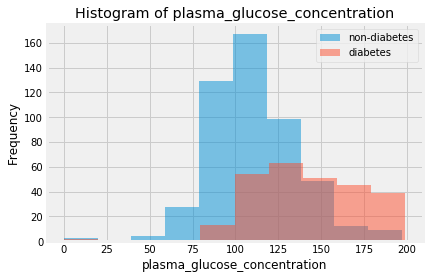

In [16]:
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col],10,alpha=0.5,label='non-diabetes');
plt.hist(pima[pima['onset_diabetes']==1][col],10,alpha=0.5,label='diabetes');
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

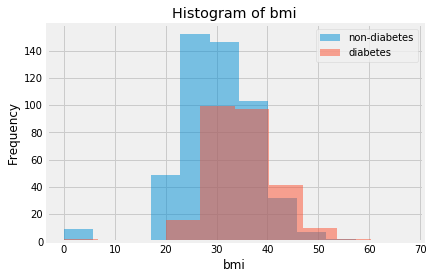

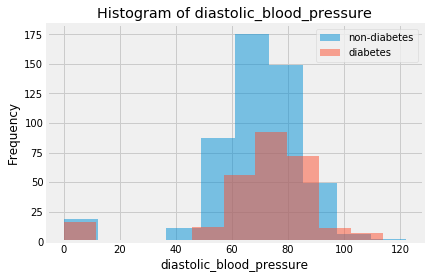

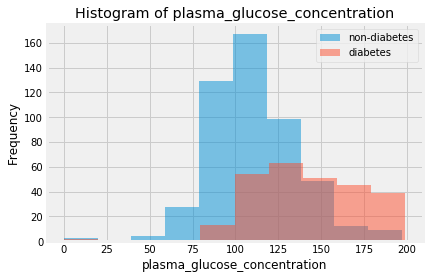

In [17]:
for col in ['bmi', 'diastolic_blood_pressure','plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5,label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5,label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()


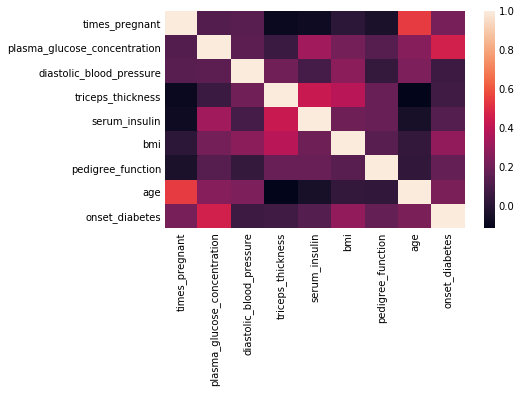

In [18]:
sns.heatmap(pima.corr())

In [22]:
pima.corr()['onset_diabetes'].sort_values(ascending=False)

onset_diabetes                  1.000000
plasma_glucose_concentration    0.466581
bmi                             0.292695
age                             0.238356
times_pregnant                  0.221898
pedigree_function               0.173844
serum_insulin                   0.130548
triceps_thickness               0.074752
diastolic_blood_pressure        0.065068
Name: onset_diabetes, dtype: float64

In [24]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma_glucose_concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum_insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [25]:
print(pima['serum_insulin'].isnull().sum())
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x!=0 else None)
print(pima['serum_insulin'].isnull().sum())

0
374


In [28]:
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration','diastolic_blood_pressure', 'triceps_thickness']
for col in columns:
    pima[col].replace([0],[None],inplace=True)
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [66]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma_glucose_concentration,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
diastolic_blood_pressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
triceps_thickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
serum_insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
bmi,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
pima_dropped = pima.dropna()

In [36]:
(pima.shape[0] - pima_dropped.shape[0]) / float(pima.shape[0])*100

48.95833333333333

In [37]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [38]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [39]:
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insulin                   0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                 -0.049650
dtype: float64

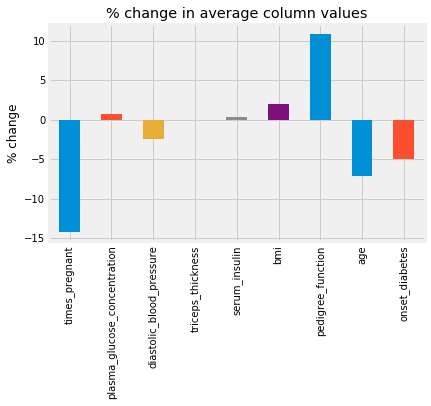

In [43]:
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()*100).plot(kind='bar',title='% change in average column values');
ax.set_ylabel('% change');


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes',axis=1)
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

learning from 392 rows


In [54]:
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,knn_params)
grid.fit(X_dropped,y_dropped)
print(grid.best_score_,grid.best_params_)

0.7448979591836735 {'n_neighbors': 7}


In [56]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [60]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [61]:
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(),inplace=True)

In [62]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [65]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)
pima_imputed = pd.DataFrame(pima_imputed,columns=pima_column_names)
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [67]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [69]:
X_imputed = pima_imputed.drop('onset_diabetes',axis=1)
print("learning from {} rows".format(X_imputed.shape[0]))
y_imputed = pima_imputed['onset_diabetes']
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,knn_params)
grid.fit(X_imputed,y_imputed)
print(grid.best_score_,grid.best_params_)

learning from 768 rows
0.73046875 {'n_neighbors': 6}


In [72]:
pima_zero = pima.fillna(0) # impute values with 0
X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)
print(grid.best_score_, grid.best_params_)
# if the values stayed at 0, our accuracy goes down

learning from 768 rows
0.7330729166666666 {'n_neighbors': 6}


In [73]:
from sklearn.model_selection import train_test_split
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

In [75]:
X.isnull().sum()

serum_insulin    374
dtype: int64

In [78]:
entire_data_set_mean = X.mean() # take the entire datasets mean
X = X.fillna(entire_data_set_mean) # and use it to fill in the missingspots
print(entire_data_set_mean)

serum_insulin    155.548223
dtype: float64


In [79]:
# the proper way.. imputing values AFTER splitting
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()
# using the same random state to obtain the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
X.isnull().sum()


serum_insulin    374
dtype: int64

In [81]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.4895833333333333


In [82]:
impute = Imputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima),columns=pima_column_names)


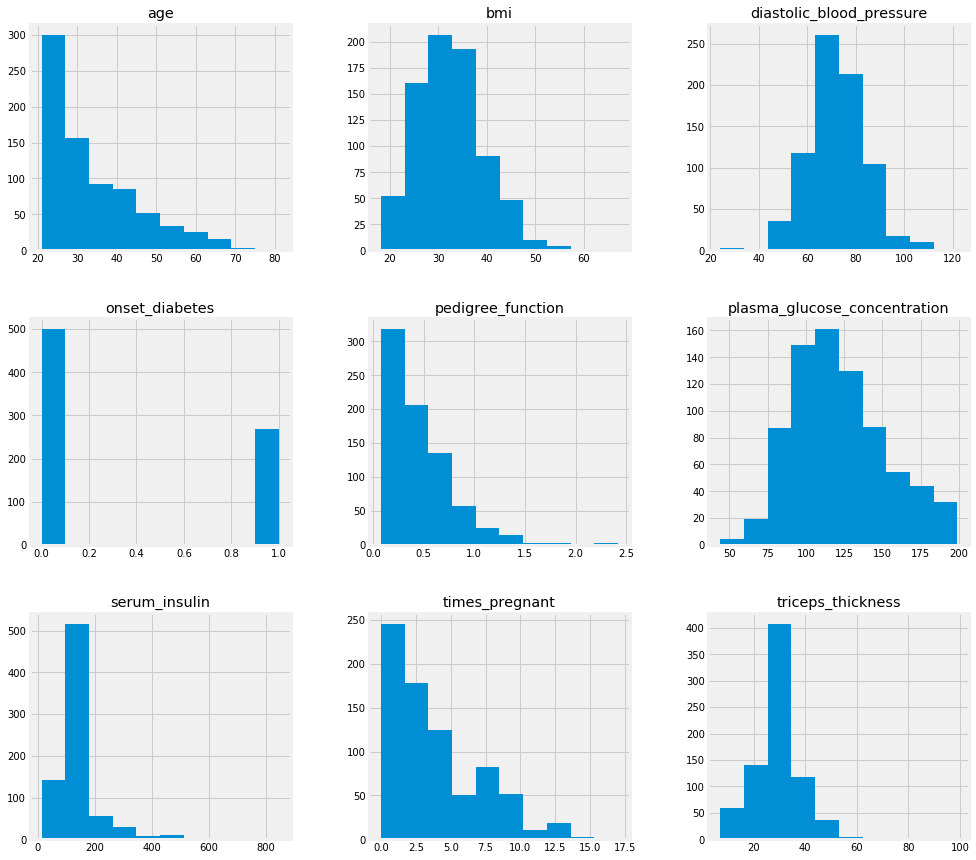

In [84]:
pima_imputed_mean.hist(figsize=(15,15));

In [85]:
pima_imputed_mean.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
plasma_glucose_concentration,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
diastolic_blood_pressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
triceps_thickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
serum_insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
bmi,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


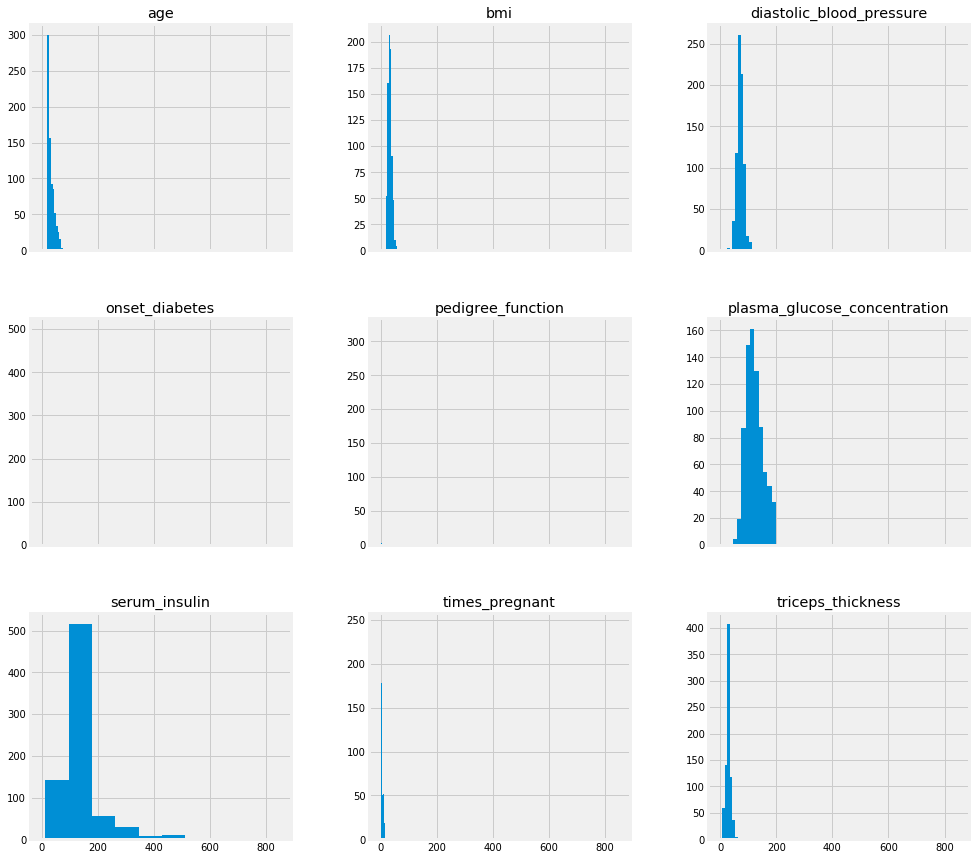

In [86]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True);
# with the same x axis (the y axis is not as important here)

In [87]:
pima['plasma_glucose_concentration'].head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64

In [88]:
mu = pima['plasma_glucose_concentration'].mean()
sigma = pima['plasma_glucose_concentration'].std()
((pima['plasma_glucose_concentration'] - mu)/sigma).head()

0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64

In [89]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
knn_params = {'imputer__strategy':['mean', 'median'],'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize',StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)


0.7421875 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


In [96]:
knn_params = {'imputer__strategy': ['mean', 'median'],
'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize',
MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}
